In [4]:

from qutip import *
import scipy.linalg as la
from scipy import *
import numpy as np
import matplotlib.pyplot as plt


# 2-level Quantum system

$H=\frac{1}{2}\omega_{R}(cos(\omega_{v}t) \hat{\sigma}_{x}+sin (\omega_{v}t) \hat{\sigma}_{y})$

Dynamic phase:  $f_{D}=\frac{-1}{\hbar} \int_{t_{0}}^{t_{F}} <\phi(t)|H(t)|\phi(t)> dt$

Geometric phase: $f_{G}=f_{T}-f_{D}$ where $f_{T}$ is the total phase gained by the state $|\phi(t)>$ in $t=T$

In [129]:
wv=1  # Frequency associated to the variation of the magnetic field 

T=2*np.pi/wv; # Magnetic field period

wR0=0; 
wRF=1; 
NwR=10;

wRlist=np.linspace(wR0,wRF,NwR);  # Larmor frequency 

args = {'wv': wv}


nT=100;

tlist= np.linspace(0, T, nT);

qe1=np.zeros(len(wRlist)) # Empty vector to save quasienergies for each value of wR

qe2=np.zeros(len(wRlist)) # Empty vector to save quasienergies for each value of wR

fD1=np.zeros(len(wRlist));

fD2=np.zeros(len(wRlist));

fG1=np.zeros(len(wRlist));

fG2=np.zeros(len(wRlist));

b = Bloch();

def fx(t,args):
    return np.cos(args["wv"]*t)

def fy(t,args):
    return np.sin(args["wv"]*t)



for n, wR in enumerate(wRlist): # Iterative process to obtain quasienergies
    
    Hx =  1/2*wR*sigmax()
    Hy = 1/2*wR*sigmay()
    H = [[Hx, fx], [Hy, fy]];
    
    f_modes_0, f_energies = floquet_modes(H, T, args)
    qe1[n]=f_energies[0]
    qe2[n]=f_energies[1]
    
    f_modes_table_t = floquet_modes_table(f_modes_0, f_energies, 
                                          tlist, H, T, args); # Calculate floquet states in all tlists
    e1=np.zeros(len(tlist))
    
    e2=np.zeros(len(tlist))
    
       
    for i, t in enumerate(tlist):
    
        psi_t_1,psi_t_2 = floquet_modes_t_lookup(f_modes_table_t, t, T) # 
        Hd=Hx*fx(t,args)+Hy*fy(t,args)
        e1[i] = expect(Hd, psi_t_1)
        e2[i] = expect(Hd, psi_t_2)
        
        fDN1=-T/nT*np.sum(e1)
        fDN2=-T/nT*np.sum(e2)
        
        nx1[i] = expect(sigmax(), psi_t_1)
        ny1[i] = expect(sigmay(), psi_t_1)
        nz1[i] = expect(sigmaz(), psi_t_1)
    
        nx2[i] = expect(sigmax(), psi_t_2)
        ny2[i] = expect(sigmay(), psi_t_2)
        nz2[i] = expect(sigmaz(), psi_t_2)
        
    PN1=[nx1,ny1,nz1]
    PN2=[nx2,ny2,nz2]
    
    b.add_points(PN1,'l')
    b.add_points(PN2,'l')

    fD1[n]=fDN1
    fD2[n]=fDN2
    
    fG1[n]=f_energies[0]-fDN1
    fG2[n]=f_energies[1]-fDN2
    

Text(0.5, 0, '$\\omega_{R}$')

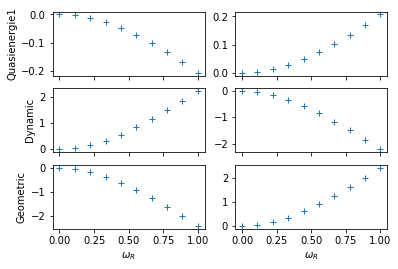

In [130]:

fig, ((ax1, ax2),( ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True)

ax1.plot(wRlist,qe1,'+')
ax1.set_ylabel('Quasienergie1')


ax2.plot(wRlist,qe2,'+')

ax3.plot(wRlist,fD1,'+')
ax3.set_ylabel('Dynamic')

ax4.plot(wRlist,fD2,'+')

ax5.plot(wRlist,fG1,'+')
ax5.set_xlabel('$\omega_{R}$')
ax5.set_ylabel('Geometric')

ax6.plot(wRlist,fG2,'+')
ax6.set_xlabel('$\omega_{R}$')


# Trajectories in Bloch Sphere

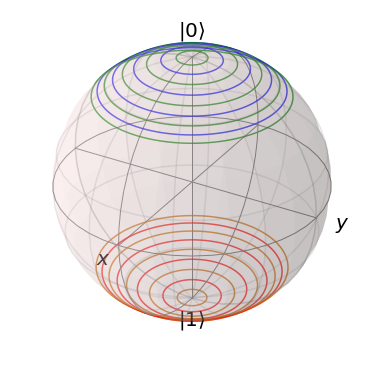

In [131]:
b.make_sphere()